**The Sparks Foundation - GRIP - Data Science and Business Analytics - JUNE 2023
TASK 3 : Exploratory Data Analysis - Retail
Author : ZAIN ABDUR RAZZAK
Dataset used: Sample Store
Alternatively, it can be downloaded through the following link - https://bit.ly/3i4rbWl
Problem Statement
Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
As a business manager, try to find out the weak areas where you can work to make more profit?
What all business problems you can derive by exploring the data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv(r"/content/SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
data.shape


(9994, 13)

In [ ]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [ ]:
data.duplicated().sum()

17

In [ ]:
data=data.drop_duplicates()
data.shape

(9977, 13)

In [ ]:
data['Postal Code'] = data['Postal Code'].astype(str)

In [ ]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   object 
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB


<Axes: >

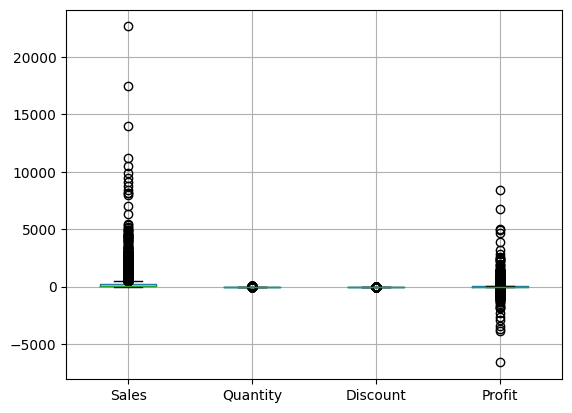

In [ ]:
data.boxplot()

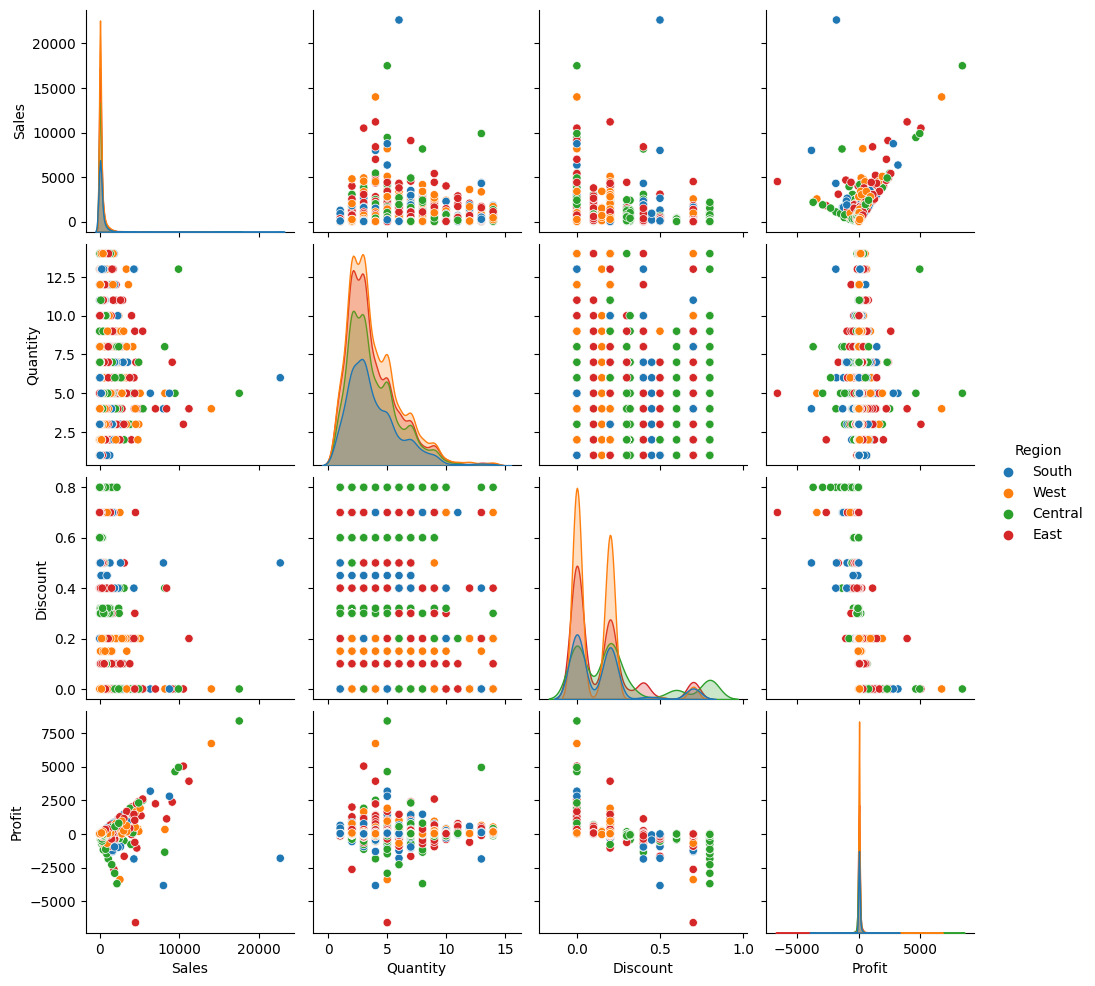

In [ ]:
sns.pairplot(data=data,hue='Region')
plt.show()

In [ ]:
x = data ['Ship Mode'].unique()
x.sort()
x

array(['First Class', 'Same Day', 'Second Class', 'Standard Class'],
      dtype=object)

In [ ]:
y = data.groupby(['Ship Mode'])['Sales'].sum()
y

Ship Mode
First Class       3.513805e+05
Same Day          1.283217e+05
Second Class      4.591770e+05
Standard Class    1.357316e+06
Name: Sales, dtype: float64

In [ ]:
ypro = data.groupby(['Ship Mode'])['Profit'].sum()
ypro

Ship Mode
First Class        48953.6561
Same Day           15871.8869
Second Class       57446.6516
Standard Class    163969.2280
Name: Profit, dtype: float64

In [ ]:
ydisc = data.groupby(['Ship Mode'])['Discount'].sum()
ydisc

Ship Mode
First Class       252.97
Same Day           82.75
Second Class      269.35
Standard Class    954.12
Name: Discount, dtype: float64

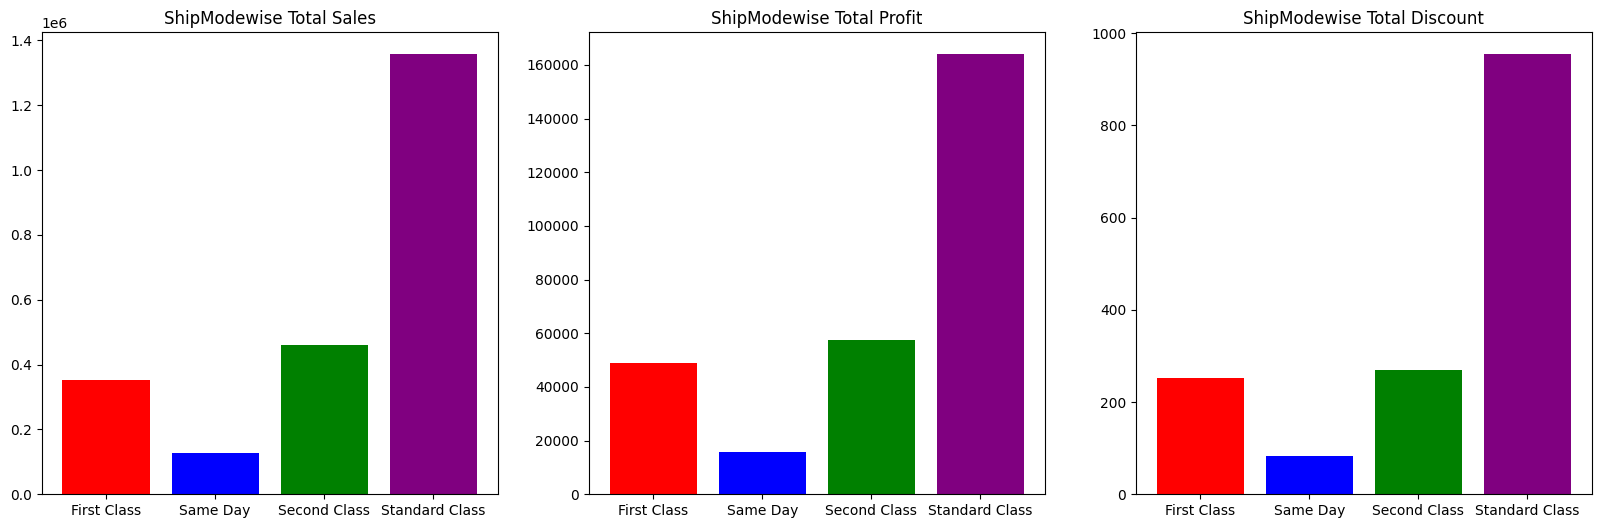

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,6))
ax1.bar(x,y,color=['red','blue','green','purple'])
ax2.bar(x,ypro,color=['red','blue','green','purple'])
ax3.bar(x,ydisc,color=['red','blue','green','purple'])
ax1.set_title('ShipModewise Total Sales')
ax2.set_title('ShipModewise Total Profit')
ax3.set_title('ShipModewise Total Discount')
plt.show()

conclusion = ship mode of standard class has more sales when compared to other classes.

Now lets compare ship mode avg sales vs avg profit

In [ ]:
y = data.groupby(['Ship Mode']).agg({'Sales':np.average})
y = y.iloc[:,-1]
y

Ship Mode
First Class       228.614490
Same Day          236.755950
Second Class      236.323750
Standard Class    227.928858
Name: Sales, dtype: float64

In [ ]:
yprof = data.groupby(['Ship Mode']).agg({'Profit':np.average})
yprof = yprof.iloc[:,-1]
yprof

Ship Mode
First Class       31.850134
Same Day          29.283924
Second Class      29.565956
Standard Class    27.534715
Name: Profit, dtype: float64

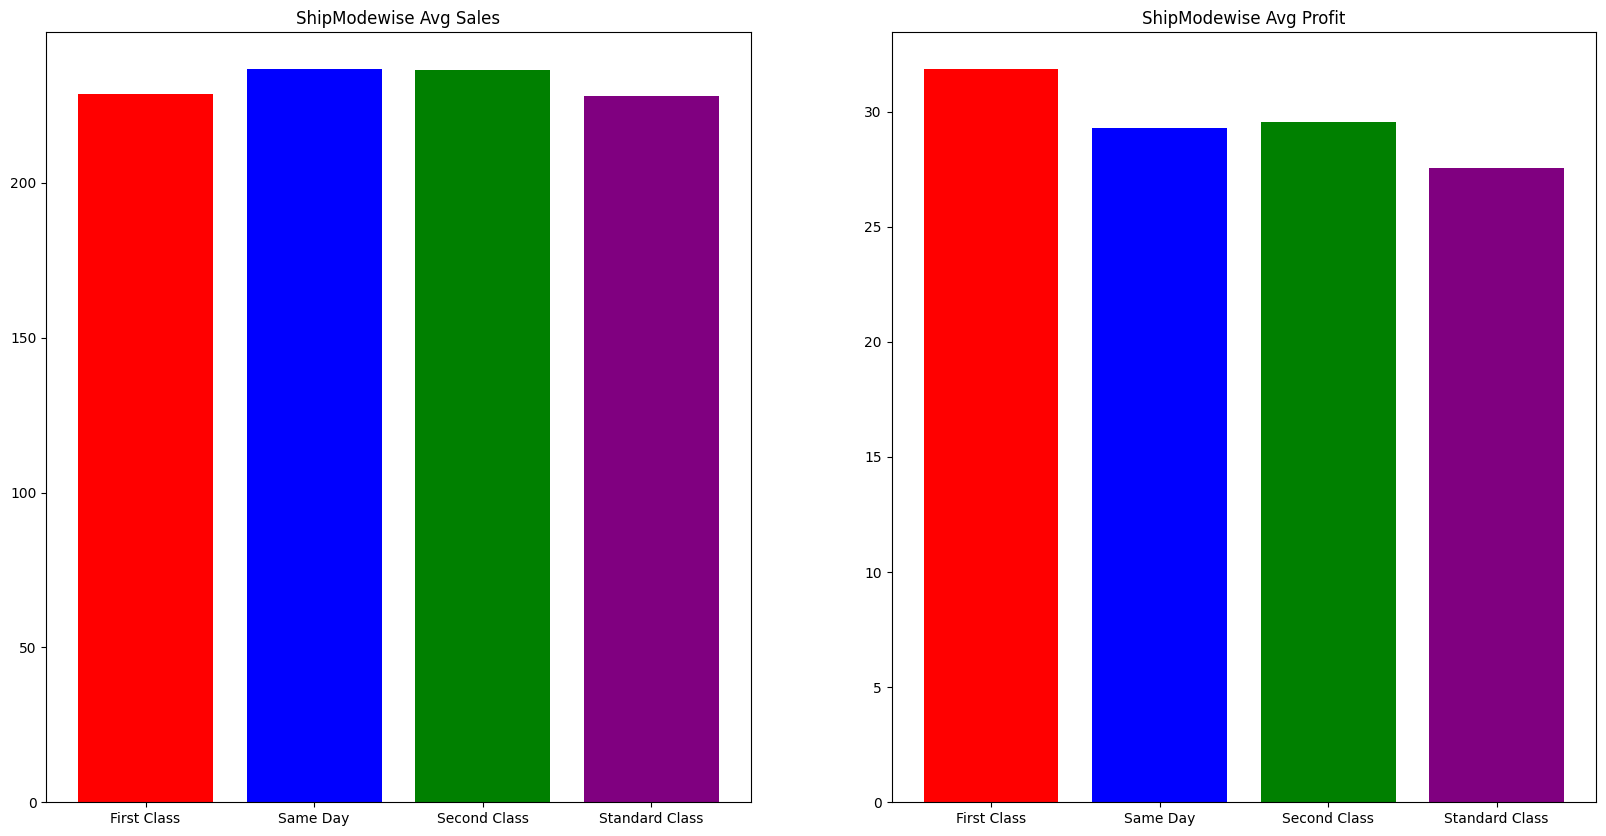

In [ ]:
fig,(ax1,ax2,) = plt.subplots(1,2,figsize=(20,10))
ax1.bar(x,y,color=['red','blue','green','purple'])
ax2.bar(x,yprof,color=['red','blue','green','purple'])
ax1.set_title('ShipModewise Avg Sales')
ax2.set_title('ShipModewise Avg Profit')
plt.show()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64


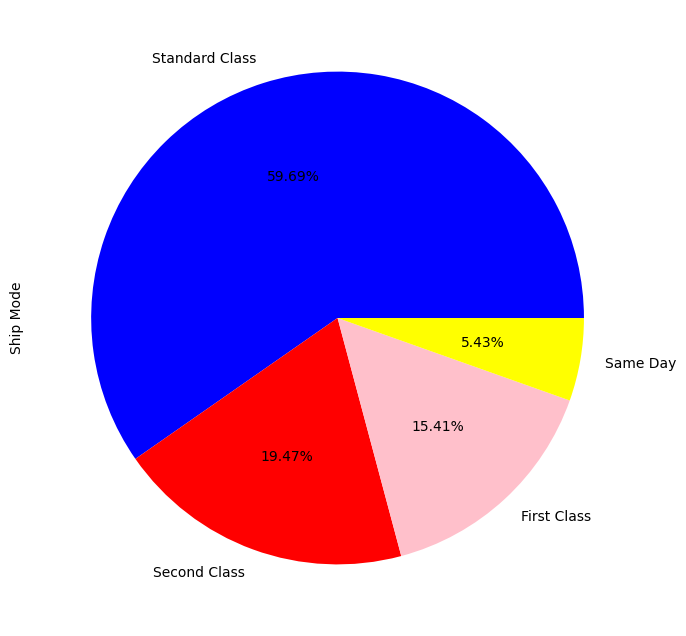

In [ ]:
c=data['Ship Mode'].value_counts()
print(c)
plt.figure(figsize=(8, 8))
d= data['Ship Mode'].value_counts().plot.pie(colors=['blue','red','pink', 'yellow'],autopct='%.2f%%')

Most commonly used mode is the standard class

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64


<Axes: ylabel='Region'>

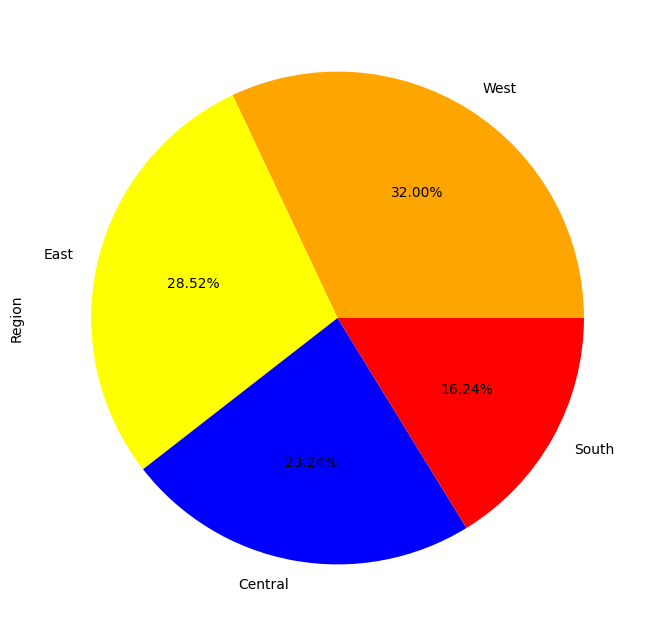

In [ ]:
#Count the number of occurance of each unique value in Region. and display distribution of regional data.
c=data['Region'].value_counts()
print(c)
plt.figure(figsize=(8, 8))
d= data['Region'].value_counts().plot.pie(colors=['orange','yellow','blue','red'],autopct='%.2f%%')
d

West region has the highest count whereas south region has the lowest

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64


<Axes: ylabel='Category'>

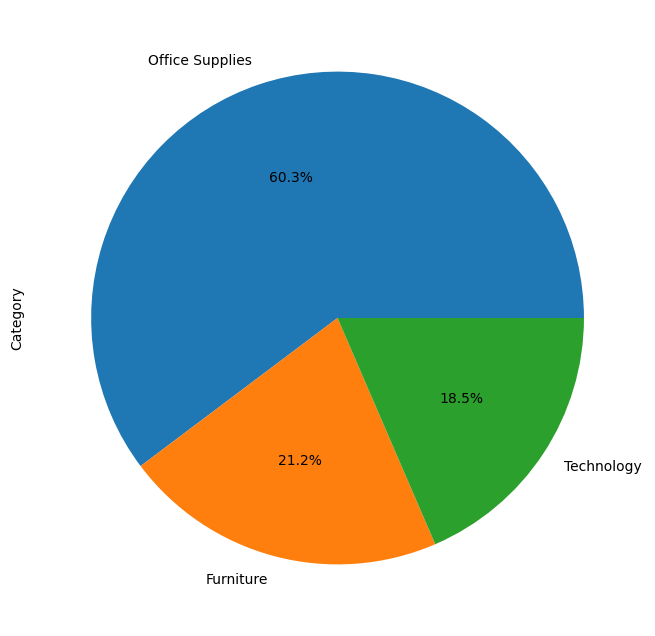

In [ ]:
#Counting the number of ocuurances of unique values in Category and the distribution of product categories.
c=data['Category'].value_counts()
print(c)
# Plot a pie chart of the 'Category' column
plt.figure(figsize=(8, 8))
data['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')


Lets calculate segment wise sales.

In [ ]:
x1 = data['Segment'].unique()
x1
y1 = data.groupby(['Segment'])['Sales'].sum()
y1

Segment
Consumer       1.160833e+06
Corporate      7.060701e+05
Home Office    4.292927e+05
Name: Sales, dtype: float64

In [ ]:
y1pro = data.groupby(['Segment'])['Profit'].sum()
y1pro

Segment
Consumer       134007.4413
Corporate       91954.9798
Home Office     60279.0015
Name: Profit, dtype: float64

In [ ]:
y1disc = data.groupby(['Segment'])['Discount'].sum()
y1disc

Segment
Consumer       820.51
Corporate      476.85
Home Office    261.83
Name: Discount, dtype: float64

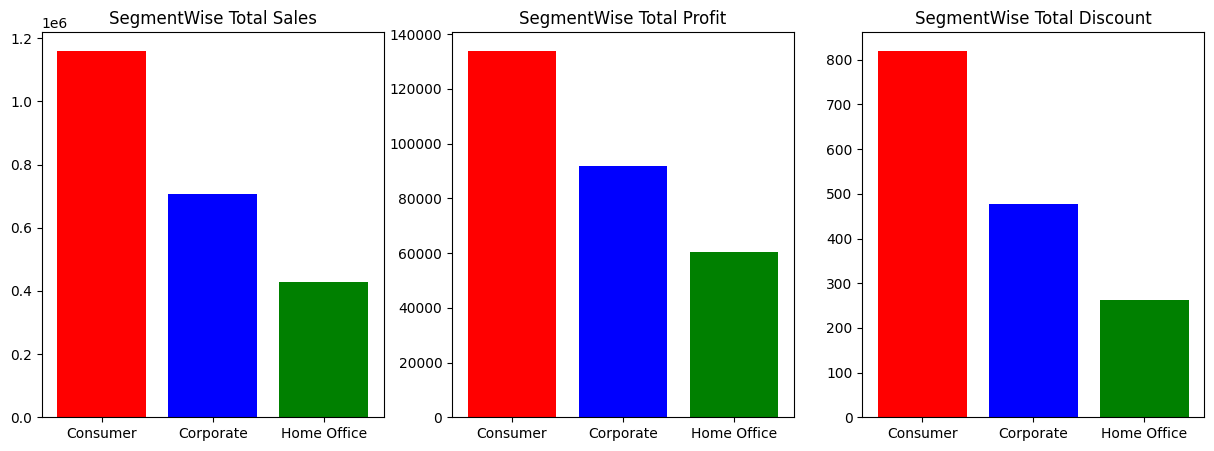

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
ax1.bar(x1,y1,color=['red','blue','green'])
ax2.bar(x1,y1pro,color=['red','blue','green'])
ax3.bar(x1,y1disc,color=['red','blue','green'])
ax1.set_title('SegmentWise Total Sales')
ax2.set_title('SegmentWise Total Profit')
ax3.set_title('SegmentWise Total Discount')
plt.show()

Consumer segment is performing very well because of the discounts being given.
If discounts are given to the other two segments then we might see a considerable increase in sales and profits it them.

**Category wise sales performance**

In [ ]:
y2 = data.groupby(['Category'])['Sales'].sum()
y2

Category
Furniture          741306.3133
Office Supplies    718735.2440
Technology         836154.0330
Name: Sales, dtype: float64

Category wise profit performance

In [ ]:
y2prof = data.groupby(['Category'])['Profit'].sum()
y2prof

Category
Furniture           18421.8137
Office Supplies    122364.6608
Technology         145454.9481
Name: Profit, dtype: float64

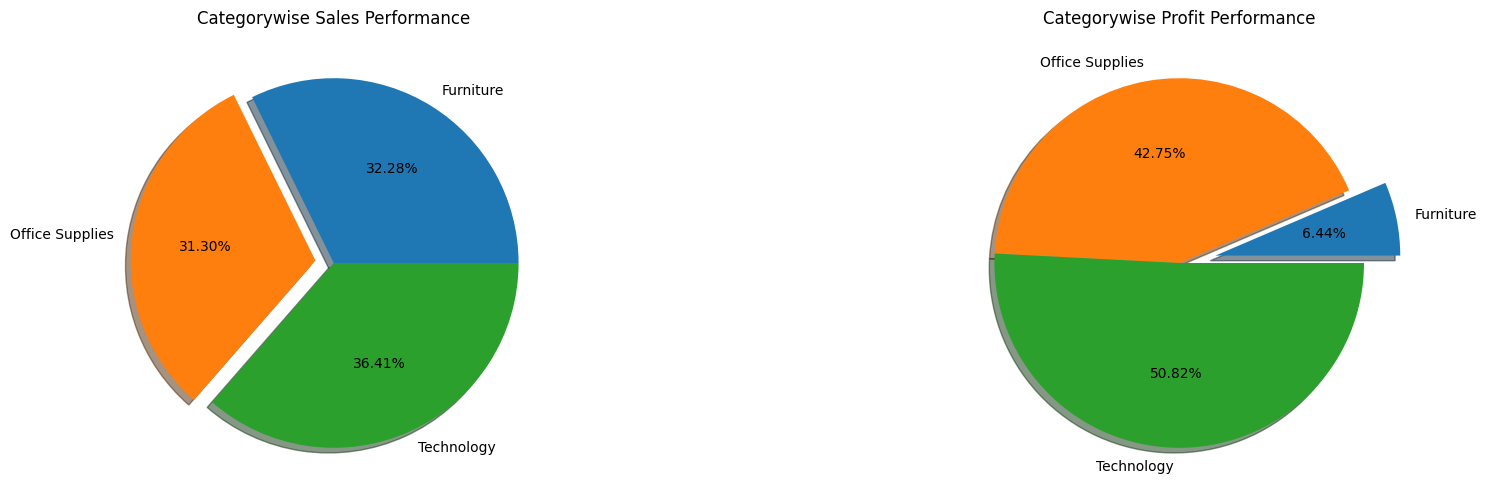

In [ ]:
fig,(ax1,ax2,) = plt.subplots(1,2,figsize=(20,6))
ax1.pie(y2,explode=[0,0.1,0],labels=['Furniture','Office Supplies','Technology'],autopct='%1.2f%%',shadow=True,radius=1,counterclock=90)
ax2.pie(y2prof,explode=[0.2,0,0],labels=['Furniture','Office Supplies','Technology'],autopct='%1.2f%%',shadow=True,radius=1,counterclock=90)
ax1.set_title('Categorywise Sales Performance')
ax2.set_title('Categorywise Profit Performance')
plt.show()

**Lets see how the sales and profits are of the states**

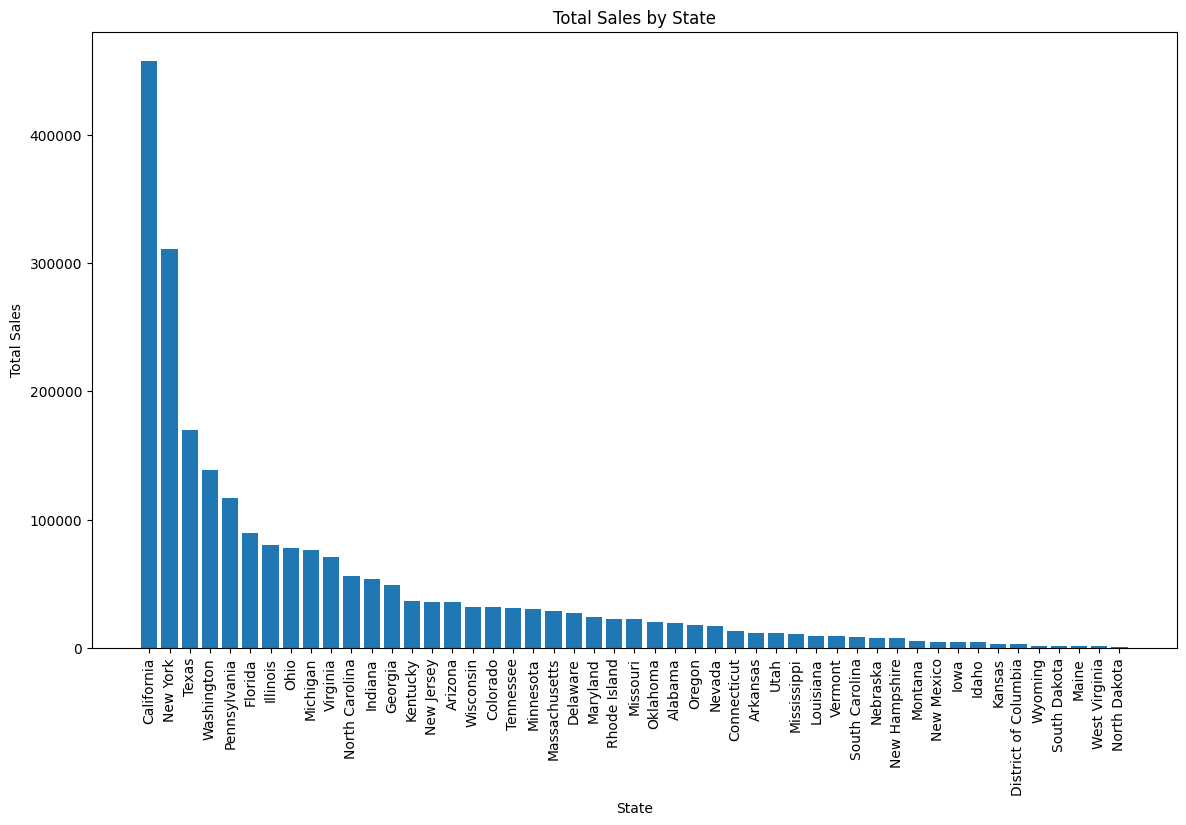

In [ ]:
# Group the data by state and calculate the total sales
state_sales = data.groupby('State')['Sales'].sum().reset_index()
#print(state_sales)

# Sort the data by sales in descending order
state_sales = state_sales.sort_values(by='Sales', ascending=False)

# Create a bar chart to visualize the sales by state
plt.figure(figsize=(14,8))
plt.bar(x=state_sales['State'], height=state_sales['Sales'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Total Sales by State')
plt.show()


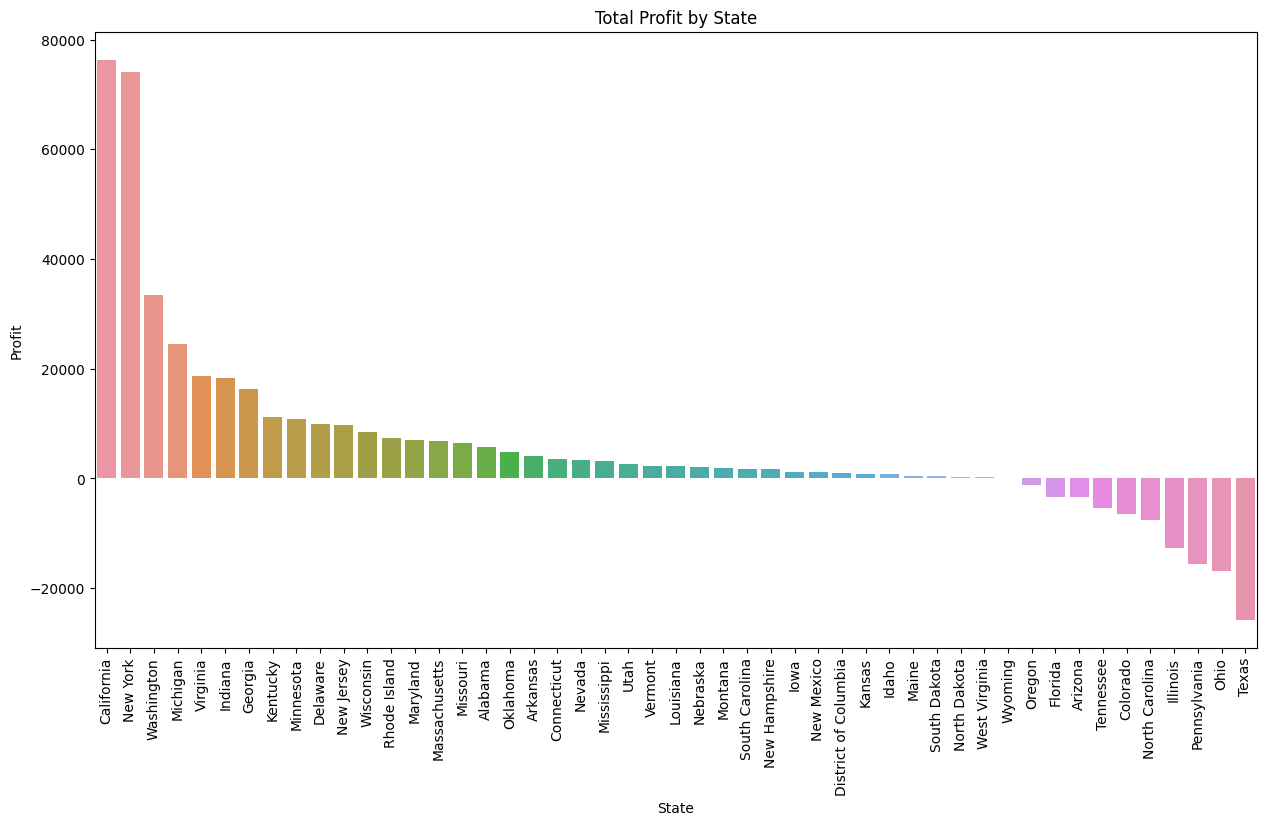

In [ ]:
# Calculate total profit by state
state_profit = data.groupby('State')['Profit'].sum().sort_values(ascending=False)
# print(state_profit)
# Create a bar plot
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=state_profit.index, y=state_profit.values)
ax.set_title('Total Profit by State')
ax.set_xlabel('State')
ax.set_ylabel('Profit')
plt.xticks(rotation=90)
plt.show()

In conclusion we can say that california,newyork and washington have some of the highest sales whereas west virginia and north dakota have the lowest sales in the country, california,newyork and washington again have the highest profits but this time ohio and texas have the lowest profits in the country.

Conclusion

As a Business Manager (Hypothesis Case) here's my finding with conclusion

The sales and profits are positively correlated, indicating that increasing sales can lead to higher profits.

The sales and profits are higher in the Western and Eastern regions of the country, while the Central region has the lowest sales and profits.

This finding can prompt businesses to analyze the reasons behind this trend and make necessary adjustments.

The majority of the orders are for the Standard shipment mode, followed by Second Class and First Class. However, the highest profits come from orders with the Same Day shipment mode. This finding can prompt businesses to focus on providing faster shipment options to their customers to increase profitability..

There is a negative correlation between discount and profit, indicating that higher discounts lead to lower profits. This finding can prompt businesses to rethink their discount strategy and optimize it for maximum profitability.